# Clickbait Detection

##### Detecting clickbait using machine learning algorithms. Dataset: https://www.kaggle.com/amananandrai/clickbait-dataset
##### Inspiration: https://www.kaggle.com/amananandrai/clickbait-detector-naive-bayes-classifier

In [ ]:
!pip install seaborn

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style

In [ ]:
clickbait_data = pd.read_csv('clickbait_data.csv')
clickbait_data

,headline,clickbait
0,Should I Get Bings,1
1,Which TV Female Friend Group Do You Belong In,1
2,"The New ""Star Wars: The Force Awakens"" Trailer...",1
3,"This Vine Of New York On ""Celebrity Big Brothe...",1
4,A Couple Did A Stunning Photo Shoot With Their...,1
...,...,...
31995,"To Make Female Hearts Flutter in Iraq, Throw a...",0
31996,"British Liberal Democrat Patsy Calton, 56, die...",0
31997,Drone smartphone app to help heart attack vict...,0
31998,"Netanyahu Urges Pope Benedict, in Israel, to D...",0


## EDA

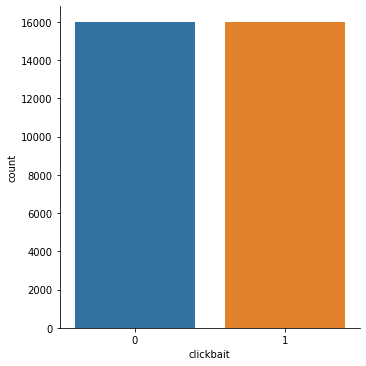

In [ ]:
sns.catplot(x='clickbait', kind = 'count', data = clickbait_data)

## Feautre Selection

#### Proportion of Capitalized Letters

#### Number of exclamation marks

#### Is it a question?

#### Starts with number?

#### NLP

In [ ]:
nlp_data = clickbait_data

In [ ]:
# Splitting into lists of words.
def split_to_words(string):
    lst = string.split()
    return lst

nlp_data['headline'] = nlp_data['headline'].apply(split_to_words)
#nlp_data['headline']

In [ ]:
# Convert to lower case.
def to_lower_case(lst):
    lowered = []
    for char in lst:
        char = char.lower()
        lowered.append(char)
    return lowered
nlp_data['headline'] = nlp_data['headline'].apply(to_lower_case)
#nlp_data['headline']

In [ ]:
# Punctuation Removal.
punc = '''!()-[]{};:'"\, <>./?@#$%^&*_~'''
def remove_punc(lst):
    result = []
    for word in lst:
        for p in punc:
            word = word.replace(p, '')
        result.append(word)
    return result

nlp_data['headline'] = nlp_data['headline'].apply(remove_punc)
#nlp_data['headline']

In [ ]:
# Remove numbers.
numbers = "0123456789"
def remove_numbers(lst):
    result = []
    for word in lst:
        word = ''.join([i for i in word if not i.isdigit()])
        result.append(word)
    return result
nlp_data['headline'] = nlp_data['headline'].apply(remove_numbers)
#nlp_data['headline']

In [ ]:
!pip install nltk

^C
Traceback (most recent call last):
  File "/opt/venv/bin/pip", line 5, in <module>
    from pip._internal.cli.main import main
  File "/opt/venv/lib/python3.7/site-packages/pip/_internal/cli/main.py", line 10, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/opt/venv/lib/python3.7/site-packages/pip/_internal/cli/autocompletion.py", line 9, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/opt/venv/lib/python3.7/site-packages/pip/_internal/cli/main_parser.py", line 7, in <module>
    from pip._internal.cli import cmdoptions
  File "/opt/venv/lib/python3.7/site-packages/pip/_internal/cli/cmdoptions.py", line 23, in <module>
    from pip._internal.cli.progress_bars import BAR_TYPES
  File "/opt/venv/lib/python3.7/site-packages/pip/_internal/cli/progress_bars.py", line 12, in <module>
    from pip._internal.utils.logging import get_indentation
  File "/opt/venv/lib/python3.7/site-packages/pip/_internal/utils/logging.p

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.probability import FreqDist

In [ ]:
# Remove stopwords.
nltk.download('stopwords')
def remove_stopwords(lst):
    stop = stopwords.words('english')
    new_lst = []
    for i in lst:
        if i not in stop:
            new_lst.append(i)
    return new_lst

nlp_data['headline'] = nlp_data['headline'].apply(remove_stopwords)
nlp_data

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,headline,clickbait
0,"[get, bings]",1
1,"[tv, female, friend, group, belong]",1
2,"[new, star, wars, force, awakens, trailer, giv...",1
3,"[vine, new, york, celebrity, big, brother, fuc...",1
4,"[couple, stunning, photo, shoot, baby, learnin...",1
...,...,...
31995,"[make, female, hearts, flutter, iraq, throw, s...",0
31996,"[british, liberal, democrat, patsy, calton, , ...",0
31997,"[drone, smartphone, app, help, heart, attack, ...",0
31998,"[netanyahu, urges, pope, benedict, israel, den...",0


In [ ]:
# Removing any remaining spaces.
def remove_spaces(lst):
    new_lst = []
    for i in lst:
        i = i.strip()
        new_lst.append(i)
    return new_lst

nlp_data['headline'] = nlp_data['headline'].apply(remove_spaces)

In [ ]:
nlp_data.head()

,headline,clickbait
0,"[get, bings]",1
1,"[tv, female, friend, group, belong]",1
2,"[new, star, wars, force, awakens, trailer, giv...",1
3,"[vine, new, york, celebrity, big, brother, fuc...",1
4,"[couple, stunning, photo, shoot, baby, learnin...",1


In [ ]:
# Lemmatization
nltk.download('wordnet')

lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatization(lst):
    result = []
    for word in lst:
        word = lemmatizer.lemmatize(word)
        result.append(word)
    return result
nlp_data['headline'] = nlp_data['headline'].apply(lemmatization)

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
nlp_data['headline'] = nlp_data['headline'].apply(lambda x: ''.join(i+' ' for i in x))

In [ ]:
freq_dist = {}
for i in nlp_data['headline']:
    x = i.split()
    for j in x:
        if j not in freq_dist.keys():
            freq_dist[j] = 1
        else:
            freq_dist[j] += 1

#freq_dist

## Machine Learning

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(clickbait_data.headline, clickbait_data.clickbait, test_size = 0.2, random_state = 2)

In [ ]:
# Term Frequency-Inverse Data Frequency
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()
train_1 = tfidf.fit_transform(train_x)
test_1 = tfidf.transform(test_x)

print("Number of features extracted: " + str(len(tfidf.get_feature_names())))
print("100 features extracted: ")
print(tfidf.get_feature_names()[:100])

Number of features extracted: 18832
100 features extracted: 
['aa', 'aaa', 'aaevpc', 'aaron', 'ab', 'abandon', 'abandoned', 'abandoning', 'abba', 'abbas', 'abbey', 'abbott', 'abby', 'abc', 'abdallahi', 'abdelbaset', 'abdicates', 'abduct', 'abducted', 'abduction', 'abductor', 'abdul', 'abdullah', 'abdulmutallab', 'abel', 'abercrombie', 'aberdeen', 'abhishek', 'abhisit', 'abide', 'ability', 'abin', 'abitibibowater', 'abject', 'abkhazia', 'ablaze', 'able', 'aboard', 'abolish', 'abombs', 'aborigine', 'aborted', 'abortion', 'abortionrights', 'aboulhosn', 'abound', 'abraham', 'abramoff', 'abrams', 'abroad', 'abrogates', 'abse', 'absence', 'absentee', 'absolute', 'absolutely', 'absolutereturn', 'absorbs', 'abstention', 'abstinence', 'absurd', 'absurdity', 'absurdly', 'abu', 'abuela', 'abuelita', 'abuelitas', 'abundant', 'abuse', 'abused', 'abuserelated', 'abusing', 'abusive', 'ac', 'academia', 'academic', 'academy', 'acapella', 'acc', 'accelerates', 'accelerating', 'accelerator', 'accent', 'a

In [ ]:
print("Shape of train set: ", train_1.shape)
print("Shape of test set: ", test_1.shape)

Shape of train set:  (25600, 18832)
Shape of test set:  (6400, 18832)


In [ ]:
train_arr = train_1.toarray()
test_arr = test_1.toarray()

In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(train_arr, train_y)
logreg_predicted = logreg.predict(test_arr)

from sklearn.metrics import f1_score, accuracy_score
logreg_score = f1_score(test_y, logreg_predicted)
print("F1 score: ", logreg_score)
logreg_accuracy = accuracy_score(test_y, logreg_predicted)*100
print("Accuracy: ", logreg_accuracy, "%")

F1 score:  0.9534739454094292
Accuracy:  95.3125 %


In [ ]:
# Naive Bayes
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(train_arr, train_y)
nb_predicted = nb.predict(test_arr)

nb_score = f1_score(test_y, nb_predicted)
print("F1 score: ", nb_score)
nb_accuracy = accuracy_score(test_y, nb_predicted)*100
print("Accuracy: ", nb_accuracy, "%")

F1 score:  0.9623876960560378
Accuracy:  96.140625 %


In [ ]:
results = pd.DataFrame({
    'Model': ['Logsitic Regression', 'Naive Bayes'],
    'F1 score': [logreg_score, nb_score],
    'Accuracy': [logreg_accuracy, nb_accuracy]
})
results = results.sort_values(by = 'F1 score', ascending = False)
results

,Model,F1 score,Accuracy
1,Naive Bayes,0.962388,96.140625
0,Logsitic Regression,0.953474,95.312500


## Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(MultinomialNB(), train_arr, train_y)
print(scores)

KernelInterrupted: Execution interrupted by the Jupyter kernel.